In [1]:
%matplotlib notebook 
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [2]:
pi=np.pi
N=100
G=4*pow(pi,2)
mi=0.01
Ri=1.
v0=0.
h=0.001
t=np.arange(0,2,h)

In [3]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i): 
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetAceleration(i,self.a)
    
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
            
                
    def ReduceSizevelocity(self,factor):
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
        
    def ReduceSize(self,factor):
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
     
    def force(self,particles, e=0.1):
        F=0
        for particle in particles:
            rd = np.linalg.norm(self.r - particle.r)
            f = - (particle.m*rd*G)/(((rd**2)+(e**2))**2/3)
            F+=f
        return F
    
    def aceleration(self,particles):
        F=self.force(particles)
        self.a=F
    
    def interactions(self,P, interes,k = 100):
        for interaccion in range(len(P)):
            if interes != interaccion:    
                condicion = np.linalg.norm(self.r - particle.r)
                condicion2 = self.radius + particle.radius
                if condicion < condicion2:
                    self.a = (k*(condicion**3)*((self.r - particle.r)/(self.radius+particle.radius))/self.m)
        
            
    def energia_del_sistema_k(self, particulas):
        Ek = 0
        for particula in particulas:
            Eo=(1/2)*particula.m*(la.norm(particula.v))**2
            Ek= Eo + Ek
        return Ek
    
    def energia_del_sistema_U(self, particulas, Em=200):
        Eu= Em-  self.energia_del_sistema_k(particulas)
        
        return Eu
    
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
    def SetAceleration(self, i, a):
        self.aVector[i] = a
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def GetAcelerationVector(self):
        return self.aVector

In [4]:
def GetindividualParticle(position, velocity, aceleration, t):

    x0 = position
    v0 = velocity
    a0 = aceleration
        
    p = Particle(x0,v0,a0,t,1.,2.0,1)
        
    return p

In [5]:
esferas_solidas = []
velocidades_iniciales = np.array([0.,0.,0.])
for i in range(N):
    r= np.random.random()
    theta=np.random.random()*pi
    phi=np.arccos(1-2*np.random.random())
    x=r*np.sin(theta)*np.cos(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(theta)
    posiciones_inicial_i=np.array([x,y,z])
    particle = GetindividualParticle(posiciones_inicial_i, velocidades_iniciales, velocidades_iniciales, t)
    esferas_solidas.append(particle)

In [6]:
def RunSimulationP(t,P):
    for it in tqdm(range(len(t))): # Evolucion temporal
        for interes in range(len(P)):
            P[interes].aceleration(P)
            P[interes].Evolution(it)
            P[interes].a = 0
        #Eki=P[0].energia_del_sistema_k(P)
        #EUi=P[0].energia_del_sistema_U(P)
        #Esk[it]=Eki
        #EsU[it]=EUi
    return P

In [7]:
esferas_solidas = RunSimulationP(t,esferas_solidas)

100%|██████████████████████████████████████████| 2000/2000 [02:05<00:00, 15.98it/s]


In [8]:
def ReduceTimeP(t,factor):
    
    for P in esferas_solidas:
        P.ReduceSize(factor)
        P.ReduceSizevelocity(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])        
    return np.array(Newt)

In [16]:
redt = ReduceTimeP(t,1)

<IPython.core.display.Javascript object>


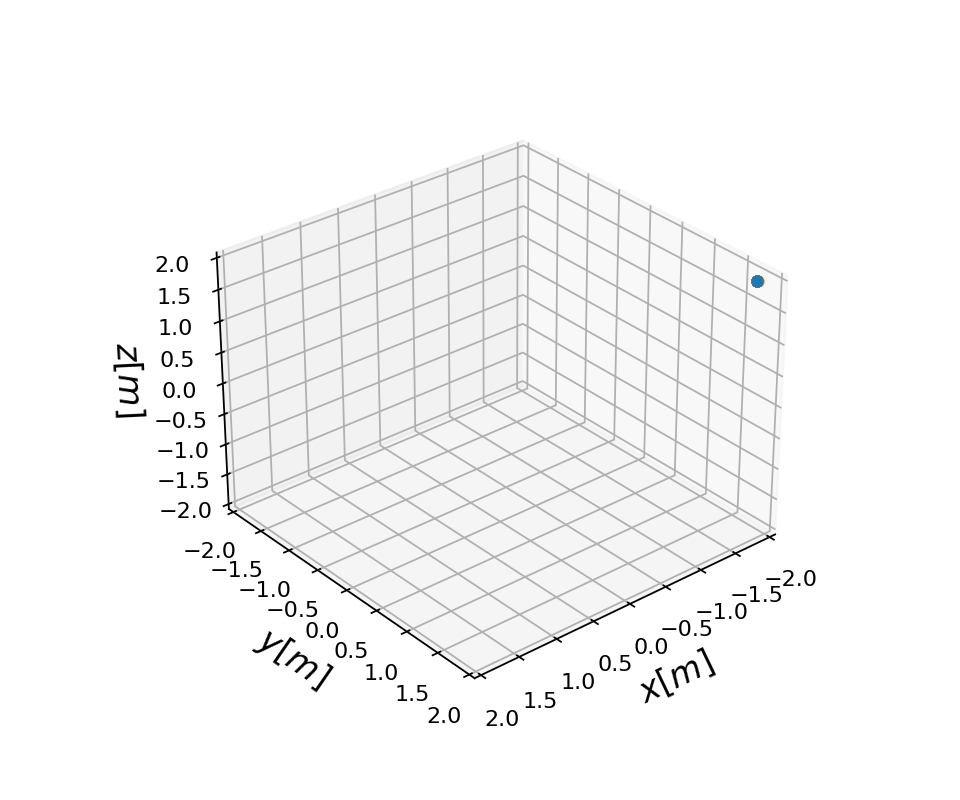

In [19]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1, projection='3d', elev=30, azim=50)

def init():
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-2,2)
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    
# Definimos una funcion de actualizacion

def Update(i):
    plot = ax.clear()
    init()
    for particle in esferas_solidas:
        r=particle.GetRPositionVector()[i]
        x=r[0]
        y=r[1]
        z=r[2]
        plot = ax.scatter(x,y,z,marker='o')
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)